# Mask R-CNN demo

This notebook illustrates one possible way of using `maskrcnn_benchmark` for computing predictions on images from an arbitrary URL.

Let's start with a few standard imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import requests, os
from io import BytesIO
from PIL import Image
import numpy as np

In [2]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

Those are the relevant imports for the detection model

Let's define a few helper functions for loading images from a URL

In [3]:
def load(url):
    """
    Given an url of an image, downloads the image and
    returns a PIL image
    """
    response = requests.get(url)
    pil_image = Image.open(BytesIO(response.content)).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")

We provide a helper class `COCODemo`, which loads a model from the config file, and performs pre-processing, model prediction and post-processing for us.

We can configure several model options by overriding the config options.
In here, we make the model run on the CPU

[2, 11, 21, 10, 10]
[5, 5, 1, 2, 11, 22, 10, 17, 12, 8]
[20, 10, 10, 5, 9, 8, 5, 6, 23, 9]
[6, 4, 1]
[20, 5, 22, 1, 5, 23, 6, 8]
[21, 6, 1, 6, 23, 22]
[20, 2, 11, 17, 21, 17, 17, 17]
[5, 22, 1, 5, 10, 10, 8]
[10]
[20, 21, 11, 17, 17, 11, 21]
[1, 2, 5, 21, 20]
[20, 2, 20, 5, 17, 17, 12, 6, 17, 17]
[2, 1, 21, 20, 10]


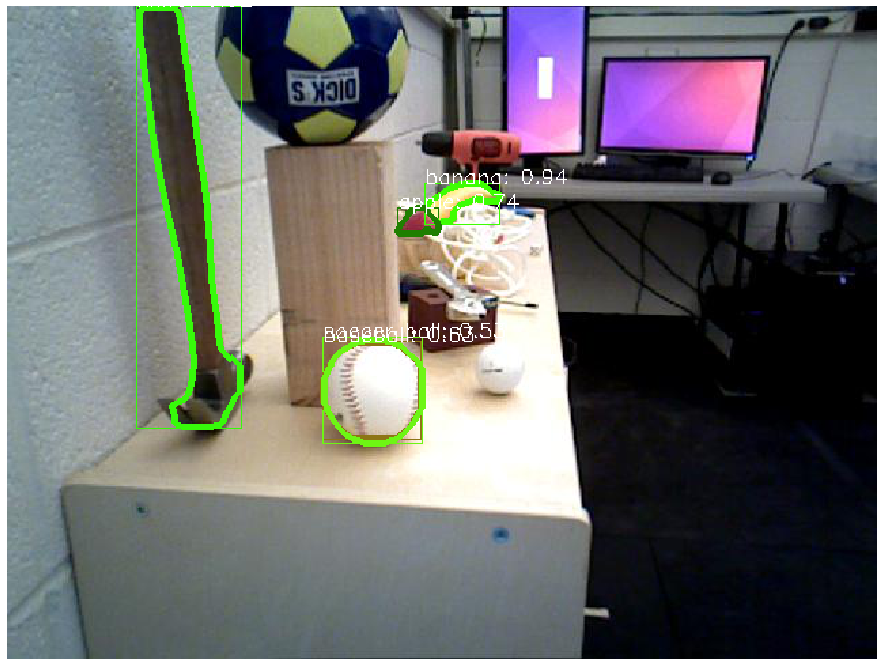

In [4]:
from maskrcnn_benchmark.config import cfg
from predictor import COCODemo

config_file = "../../../config/LVIS_config.yaml"


model_num = [15000]
for m in model_num:
    if not os.path.exists('../../../data/RSSData/test-object/JPEGImages/LVISmodel%d/'%m):
        os.mkdir('../../../data/RSSData/test-object/JPEGImages/LVISmodel%d/'%m)
    # update the config options with the config file
    cfg.merge_from_file(config_file)
    # manual override some options
    cfg.merge_from_list(["MODEL.WEIGHT", "../output/LVIS_output/model_%07d.pth"%m])
    cfg.merge_from_list(["MODEL.DEVICE", "cuda"])

    coco_demo = COCODemo(
        cfg,
        min_image_size=800,
        confidence_threshold=0.3,
    )
    

    # compute predictions
    import skimage.io as io
    import glob
    files = glob.glob('../../../data/RSSData/test-object/JPEGImages/*.jpg')

    for idx, f in enumerate(files):
        image = io.imread(f)[:, :, [2, 1, 0]]
        predictions = coco_demo.run_on_opencv_image(image)
        imshow(predictions)
        
        io.imsave('../../../data/RSSData/test-object/JPEGImages/LVISmodel%d/%s'%(m, f.split('/')[-1]), predictions[:,:,[2,1,0]])
    

Now we create the `COCODemo` object. It contains a few extra options for conveniency, such as the confidence threshold for detections to be shown.

In [7]:
print(files)

[]


Let's now load an image from the COCO dataset. It's reference is in the comment

### Computing the predictions

We provide a `run_on_opencv_image` function, which takes an image as it was loaded by OpenCV (in `BGR` format), and computes the predictions on them, returning an image with the predictions overlayed on the image.

TypeError: imsave() missing 1 required positional argument: 'arr'

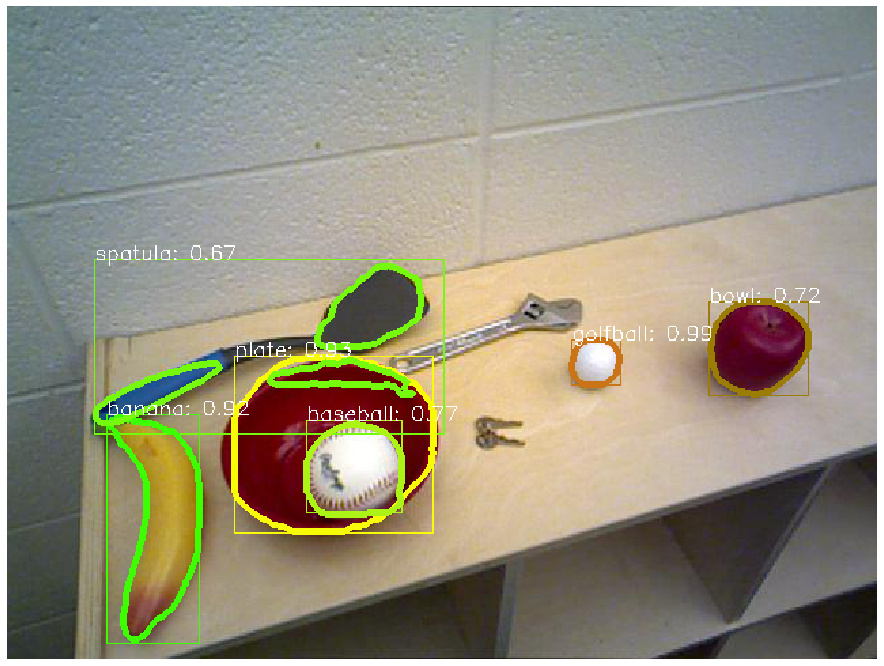

## Keypoints Demo

In [ ]:
# set up demo for keypoints
config_file = "../configs/caffe2/e2e_keypoint_rcnn_R_50_FPN_1x_caffe2.yaml"
cfg.merge_from_file(config_file)
cfg.merge_from_list(["MODEL.DEVICE", "cpu"])
cfg.merge_from_list(["MODEL.MASK_ON", False])

coco_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.7,
)

In [ ]:
# run demo
image = load("http://farm9.staticflickr.com/8419/8710147224_ff637cc4fc_z.jpg")
predictions = coco_demo.run_on_opencv_image(image)
imshow(predictions)